In [1]:
import pandas as pd
from copy import deepcopy
import numpy as np

In [2]:
barcodes = pd.read_csv('https://raw.githubusercontent.com/juliendelile/MouseSpinalCordAtlas/master/output/phenoData_annotated.csv', sep = '\t', index_col = 0)

In [3]:
selected_genes = pd.read_csv('/Users/sophielohshvits/Desktop/selected_genes.csv', sep = ',', index_col = 0)

In [20]:
depth = pd.read_csv('https://raw.githubusercontent.com/eentartetekunst/latrophilines/main/depth.tsv', sep = '\t', index_col = 0)

In [5]:
barcodes

,timepoint,replicate_id,Type_step1,Type_step2,Type_step2_unique,DV,Neuron_subtypes,Pseudotime
AAACCTGAGCAGACTG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGCAAGCGAGT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTCCCTACT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCAGCACAT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCCCTTGCA-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGTCAAGCTATGCT-11,13.5,3,Neuron,dl2,dl2,11.0,dl2.1,95.128997
TTTGTCAGTAGCTAAA-11,13.5,3,Neuron,dl4,dl4.1,9.0,dl4.6,83.166268
TTTGTCATCAGGTTCA-11,13.5,3,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCGGAATCT-11,13.5,3,Neuron,Null_Neuron,Null_Neuron,NaN,NaN,NaN


In [6]:
barcodes9 = barcodes[barcodes["timepoint"] == 9.5]
barcodes9

,timepoint,replicate_id,Type_step1,Type_step2,Type_step2_unique,DV,Neuron_subtypes,Pseudotime
AAACCTGAGCAGACTG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGCAAGCGAGT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTCCCTACT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCAGCACAT-1,9.5,1,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGTCCCTTGCA-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGTCAGTTCACGGC-2,9.5,2,Neural Crest I,NaN,Neural Crest I,NaN,NaN,NaN
TTTGTCAGTTTACTCT-2,9.5,2,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCAATAAGG-2,9.5,2,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCCGCATCT-2,9.5,2,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
selected_genes

,AAACCTGAGCAGACTG-1,AAACCTGCAAGCGAGT-1,AAACCTGGTCCCTACT-1,AAACCTGTCAGCACAT-1,AAACCTGTCCCTTGCA-1,AAACCTGTCTGTACGA-1,AAACGGGAGATAGGAG-1,AAACGGGAGGCCATAG-1,AAACGGGAGTCGAGTG-1,AAACGGGCAATGGACG-1,...,TTTGGTTAGTTAAGTG-11,TTTGGTTTCAGTACGT-11,TTTGGTTTCTCGCATC-11,TTTGGTTTCTGCCCTA-11,TTTGTCAAGATGTGGC-11,TTTGTCAAGCTATGCT-11,TTTGTCAGTAGCTAAA-11,TTTGTCATCAGGTTCA-11,TTTGTCATCGGAATCT-11,TTTGTCATCGTGGTCG-11
ENSMUSG00000013033,0,0,1,0,0,0,0,0,0,2,...,0,0,1,0,0,1,0,0,0,0
ENSMUSG00000028184,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
ENSMUSG00000037605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
ENSMUSG00000016150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000049336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000031561,0,1,0,0,0,0,1,1,0,1,...,0,0,0,1,1,0,0,1,0,0
ENSMUSG00000048078,0,0,0,0,0,0,1,0,0,2,...,0,0,1,0,0,0,0,0,0,0
ENSMUSG00000047787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000047414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000051379,0,1,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0


In [8]:
selected_genes9_1 = selected_genes[barcodes9.loc[~barcodes9['Type_step1'].isna()].index]
# day 9 type step1

In [9]:
# бесполезные способы выбрать true индексы:
# x = {k:v for k,v in enumerate(inind) if v == True}
# np.where(inind)[0]
# [i for i, x in enumerate(inind) if x]

In [10]:
selected_genes.columns.values[10]

'AAACGGGTCACGGTTA-1'

In [11]:
selected_genes9_1

,AAACCTGAGCAGACTG-1,AAACCTGTCCCTTGCA-1,AAACCTGTCTGTACGA-1,AAACGGGAGATAGGAG-1,AAACGGGCAATGGACG-1,AAACGGGTCCACGTTC-1,AAACGGGTCCATGCTC-1,AAACGGGTCGCCGTGA-1,AAAGATGGTCAAAGCG-1,AAAGATGGTTGGTTTG-1,...,TTTGCGCTCGGTCCGA-2,TTTGCGCTCTTCATGT-2,TTTGGTTCAGACGCCT-2,TTTGGTTGTAATTGGA-2,TTTGGTTTCAGTCCCT-2,TTTGGTTTCTTGAGGT-2,TTTGTCACAGGAATGC-2,TTTGTCAGTGAGTGAC-2,TTTGTCAGTTCACGGC-2,TTTGTCATCTTGAGGT-2
ENSMUSG00000013033,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ENSMUSG00000028184,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,3,2,0,1
ENSMUSG00000037605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000016150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000049336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000031561,0,0,0,1,1,0,2,1,1,0,...,0,0,0,0,0,0,2,0,0,0
ENSMUSG00000048078,0,0,0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
ENSMUSG00000047787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000047414,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ENSMUSG00000051379,0,0,0,0,7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4


In [12]:
barcodes9 = barcodes9.loc[~barcodes9['Type_step1'].isna()]
barcodes9

,timepoint,replicate_id,Type_step1,Type_step2,Type_step2_unique,DV,Neuron_subtypes,Pseudotime
AAACCTGAGCAGACTG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGTCCCTTGCA-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACCTGTCTGTACGA-1,9.5,1,Mesoderm II,NaN,Mesoderm II,NaN,NaN,NaN
AAACGGGAGATAGGAG-1,9.5,1,Mesoderm V,NaN,Mesoderm V,NaN,NaN,NaN
AAACGGGCAATGGACG-1,9.5,1,Mesoderm I,NaN,Mesoderm I,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGGTTTCTTGAGGT-2,9.5,2,Progenitor,FP,FP,1.0,NaN,27.302221
TTTGTCACAGGAATGC-2,9.5,2,Progenitor,dp3,dp3,10.0,NaN,22.549100
TTTGTCAGTGAGTGAC-2,9.5,2,Mesoderm III,NaN,Mesoderm III,NaN,NaN,NaN
TTTGTCAGTTCACGGC-2,9.5,2,Neural Crest I,NaN,Neural Crest I,NaN,NaN,NaN


In [13]:
subtypes_by_barcodes = barcodes9['Type_step1']
subtypes_by_barcodes

AAACCTGAGCAGACTG-1        Mesoderm V
AAACCTGTCCCTTGCA-1        Mesoderm V
AAACCTGTCTGTACGA-1       Mesoderm II
AAACGGGAGATAGGAG-1        Mesoderm V
AAACGGGCAATGGACG-1        Mesoderm I
                           ...      
TTTGGTTTCTTGAGGT-2        Progenitor
TTTGTCACAGGAATGC-2        Progenitor
TTTGTCAGTGAGTGAC-2      Mesoderm III
TTTGTCAGTTCACGGC-2    Neural Crest I
TTTGTCATCTTGAGGT-2      Mesoderm III
Name: Type_step1, Length: 5351, dtype: object

In [14]:
genes_renamed_columns = deepcopy(selected_genes9_1)
new_cols = {key: value for key, value in zip(genes_renamed_columns.columns.values, subtypes_by_barcodes.values)}

In [15]:
genes_renamed_columns.rename(columns = new_cols, inplace=True)

In [16]:
genes_cell_types_counts = genes_renamed_columns.groupby(lambda x: x, axis=1).sum()

In [17]:
genes_cell_types_counts

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
ENSMUSG00000013033,3,0,2,2,1,102,31,115,17,113,...,1,24,7,8,1,5,21,22,150,9
ENSMUSG00000028184,29,2,23,2,0,346,94,406,98,528,...,40,131,31,20,6,22,142,93,1135,50
ENSMUSG00000037605,1,0,1,0,0,30,7,40,11,43,...,2,4,2,3,2,1,24,4,63,1
ENSMUSG00000016150,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
ENSMUSG00000049336,0,0,0,0,0,1,0,1,0,6,...,0,1,0,0,0,0,6,2,9,3
ENSMUSG00000031561,6,1,10,2,1,265,70,291,41,307,...,13,117,52,15,6,7,165,48,861,32
ENSMUSG00000048078,0,1,3,3,0,206,65,252,39,294,...,5,67,24,13,2,8,64,32,535,9
ENSMUSG00000047787,0,0,0,0,0,12,4,5,5,6,...,0,29,8,4,2,3,2,1,7,2
ENSMUSG00000047414,16,0,3,0,0,344,47,266,40,322,...,0,6,2,1,0,0,6,24,58,14
ENSMUSG00000051379,2,0,4,5,0,454,132,450,89,703,...,7,219,72,11,8,18,61,107,563,40


In [33]:
depth = depth.loc[subtypes_by_barcodes.index]
depth = depth.T

In [19]:
subtypes_by_barcodes

AAACCTGAGCAGACTG-1        Mesoderm V
AAACCTGTCCCTTGCA-1        Mesoderm V
AAACCTGTCTGTACGA-1       Mesoderm II
AAACGGGAGATAGGAG-1        Mesoderm V
AAACGGGCAATGGACG-1        Mesoderm I
                           ...      
TTTGGTTTCTTGAGGT-2        Progenitor
TTTGTCACAGGAATGC-2        Progenitor
TTTGTCAGTGAGTGAC-2      Mesoderm III
TTTGTCAGTTCACGGC-2    Neural Crest I
TTTGTCATCTTGAGGT-2      Mesoderm III
Name: Type_step1, Length: 5351, dtype: object

In [34]:
depth_cols = {key: value for key, value in zip(depth.columns.values, subtypes_by_barcodes.values)}
depth.rename(columns = depth_cols, inplace=True)

In [35]:
celltypes_depth = depth.groupby(lambda x: x, axis=1).sum()
celltypes_depth

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
Depth,390592,502746,363725,2024608,133950,7925492,2123463,9226858,1865091,11745136,...,310030,3698998,1239072,553513,202369,326640,3240375,1085449,16343792,664337


In [36]:
celltypes_norm = genes_cell_types_counts.div(celltypes_depth.values, axis=1) * 1e6

In [37]:
celltypes_norm.to_csv('day9_type1_norm.csv')
celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
ENSMUSG00000013033,7.680649,0.000000,5.498660,0.987846,7.465472,12.869863,14.598795,12.463614,9.114837,9.621004,...,3.225494,6.488244,5.649389,14.453138,4.941468,15.307372,6.480731,20.268110,9.177797,13.547341
ENSMUSG00000028184,74.246272,3.978152,63.234587,0.987846,0.000000,43.656596,44.267312,44.001978,52.544353,44.954780,...,129.019772,35.414996,25.018724,36.132846,29.648810,67.352437,43.822088,85.678830,69.445328,75.263007
ENSMUSG00000037605,2.560216,0.000000,2.749330,0.000000,0.000000,3.785254,3.296502,4.335170,5.897836,3.661090,...,6.450989,1.081374,1.614111,5.419927,9.882937,3.061474,7.406550,3.685111,3.854675,1.505260
ENSMUSG00000016150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.270343,0.000000,0.000000,0.000000,0.000000,0.308606,0.000000,0.000000,0.000000
ENSMUSG00000049336,0.000000,0.000000,0.000000,0.000000,0.000000,0.126175,0.000000,0.108379,0.000000,0.510850,...,0.000000,0.270343,0.000000,0.000000,0.000000,0.000000,1.851638,1.842555,0.550668,4.515780
ENSMUSG00000031561,15.361298,1.989076,27.493299,0.987846,7.465472,33.436410,32.965020,31.538363,21.982842,26.138480,...,41.931426,31.630187,41.966891,27.099635,29.648810,21.430321,50.920032,44.221331,52.680553,48.168324
ENSMUSG00000048078,0.000000,1.989076,8.247990,1.481768,0.000000,25.992077,30.610376,27.311572,20.910508,25.031639,...,16.127472,18.113013,19.369334,23.486350,9.882937,24.491795,19.750800,29.480888,32.734142,13.547341
ENSMUSG00000047787,0.000000,0.000000,0.000000,0.000000,0.000000,1.514102,1.883715,0.541896,2.680834,0.510850,...,0.000000,7.839961,6.456445,7.226569,9.882937,9.184423,0.617213,0.921278,0.428297,3.010520
ENSMUSG00000047414,40.963461,0.000000,8.247990,0.000000,0.000000,43.404245,22.133656,28.828882,21.446675,27.415604,...,0.000000,1.622061,1.614111,1.806642,0.000000,0.000000,1.851638,22.110666,3.548748,21.073642
ENSMUSG00000051379,5.120433,0.000000,10.997319,2.469614,0.000000,57.283510,62.162609,48.770665,47.718851,59.854564,...,22.578460,59.205223,58.108003,19.873065,39.531746,55.106539,18.824982,98.576718,34.447330,60.210405


In [38]:
log_celltypes_norm = celltypes_norm.apply(lambda x: x + 1, axis=1)
log_celltypes_norm = np.log2(log_celltypes_norm)
log_celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
ENSMUSG00000013033,3.117803,0.00000,2.700142,0.991206,3.081591,3.793882,3.963363,3.750994,3.338401,3.408848,...,2.079120,2.904627,2.733222,3.949828,2.570820,4.027452,2.903179,4.410620,3.347353,3.862684
ENSMUSG00000028184,6.233548,2.31561,6.005278,0.991206,0.000000,5.480801,5.500398,5.491916,5.742663,5.522143,...,7.022587,5.186461,4.701478,5.214624,4.937759,6.094921,5.486138,6.437608,6.138432,6.252912
ENSMUSG00000037605,1.831965,0.00000,1.906633,0.000000,0.000000,2.258595,2.103163,2.415534,2.786144,2.220667,...,2.897432,1.057536,1.386321,2.682557,3.443996,2.022004,3.071514,2.228083,2.279375,1.324960
ENSMUSG00000016150,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,0.388031,0.000000,0.000000,0.000000
ENSMUSG00000049336,0.000000,0.00000,0.000000,0.000000,0.000000,0.171431,0.000000,0.148452,0.000000,0.595360,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,1.511791,1.507189,0.632890,2.463565
ENSMUSG00000031561,4.032215,1.57970,4.832551,0.991206,3.081591,5.105863,5.085978,5.024070,4.522485,4.762268,...,5.423962,5.028135,5.425153,4.812479,4.937759,4.487378,5.698219,5.498932,5.746328,5.619657
ENSMUSG00000048078,0.000000,1.57970,3.209140,1.311368,0.000000,4.754464,4.982326,4.823320,4.453551,4.702194,...,4.098240,4.256483,4.348327,4.613906,3.443996,4.671961,4.375095,4.929833,5.076138,3.862684
ENSMUSG00000047787,0.000000,0.00000,0.000000,0.000000,0.000000,1.330043,1.527929,0.624706,1.880033,0.595360,...,0.000000,3.144040,2.898488,3.040291,3.443996,3.348292,0.693509,0.942066,0.514296,2.003789
ENSMUSG00000047414,5.391062,0.00000,3.209140,0.000000,0.000000,5.472626,4.531921,4.898638,4.488430,4.828611,...,0.000000,1.390701,1.386321,1.488845,0.000000,0.000000,1.511791,4.530487,2.185470,4.464253
ENSMUSG00000051379,2.613634,0.00000,3.584640,1.794775,0.000000,5.865016,5.980999,5.637224,5.606408,5.927294,...,4.559398,5.911817,5.885282,4.383571,5.340980,5.810097,4.309248,6.637737,5.147605,5.935705


In [39]:
log_celltypes_norm = log_celltypes_norm.rename(index={"ENSMUSG00000013033":'ADGRL1',
"ENSMUSG00000028184": 'ADGRL2',
"ENSMUSG00000037605": 'ADGRL3',
"ENSMUSG00000016150": 'TENM1',
"ENSMUSG00000049336": 'TENM2',
"ENSMUSG00000031561": 'TENM3',
"ENSMUSG00000048078": 'TENM4',
"ENSMUSG00000047787": 'FLRT1',
"ENSMUSG00000047414": 'FLRT2',
"ENSMUSG00000051379": 'FLRT3',
"ENSMUSG00000024109": 'NRXN1'})

log_celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,Hematopoeitic,Mesoderm I,Mesoderm II,Mesoderm III,Mesoderm IV,Mesoderm V,...,Myoblast,Neural Crest I,Neural Crest II,Neural crest neurons I,Neural crest neurons II,Neural crest neurons III,Neuron,Outliers,Progenitor,Skin
ADGRL1,3.117803,0.00000,2.700142,0.991206,3.081591,3.793882,3.963363,3.750994,3.338401,3.408848,...,2.079120,2.904627,2.733222,3.949828,2.570820,4.027452,2.903179,4.410620,3.347353,3.862684
ADGRL2,6.233548,2.31561,6.005278,0.991206,0.000000,5.480801,5.500398,5.491916,5.742663,5.522143,...,7.022587,5.186461,4.701478,5.214624,4.937759,6.094921,5.486138,6.437608,6.138432,6.252912
ADGRL3,1.831965,0.00000,1.906633,0.000000,0.000000,2.258595,2.103163,2.415534,2.786144,2.220667,...,2.897432,1.057536,1.386321,2.682557,3.443996,2.022004,3.071514,2.228083,2.279375,1.324960
TENM1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,0.388031,0.000000,0.000000,0.000000
TENM2,0.000000,0.00000,0.000000,0.000000,0.000000,0.171431,0.000000,0.148452,0.000000,0.595360,...,0.000000,0.345219,0.000000,0.000000,0.000000,0.000000,1.511791,1.507189,0.632890,2.463565
TENM3,4.032215,1.57970,4.832551,0.991206,3.081591,5.105863,5.085978,5.024070,4.522485,4.762268,...,5.423962,5.028135,5.425153,4.812479,4.937759,4.487378,5.698219,5.498932,5.746328,5.619657
TENM4,0.000000,1.57970,3.209140,1.311368,0.000000,4.754464,4.982326,4.823320,4.453551,4.702194,...,4.098240,4.256483,4.348327,4.613906,3.443996,4.671961,4.375095,4.929833,5.076138,3.862684
FLRT1,0.000000,0.00000,0.000000,0.000000,0.000000,1.330043,1.527929,0.624706,1.880033,0.595360,...,0.000000,3.144040,2.898488,3.040291,3.443996,3.348292,0.693509,0.942066,0.514296,2.003789
FLRT2,5.391062,0.00000,3.209140,0.000000,0.000000,5.472626,4.531921,4.898638,4.488430,4.828611,...,0.000000,1.390701,1.386321,1.488845,0.000000,0.000000,1.511791,4.530487,2.185470,4.464253
FLRT3,2.613634,0.00000,3.584640,1.794775,0.000000,5.865016,5.980999,5.637224,5.606408,5.927294,...,4.559398,5.911817,5.885282,4.383571,5.340980,5.810097,4.309248,6.637737,5.147605,5.935705


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

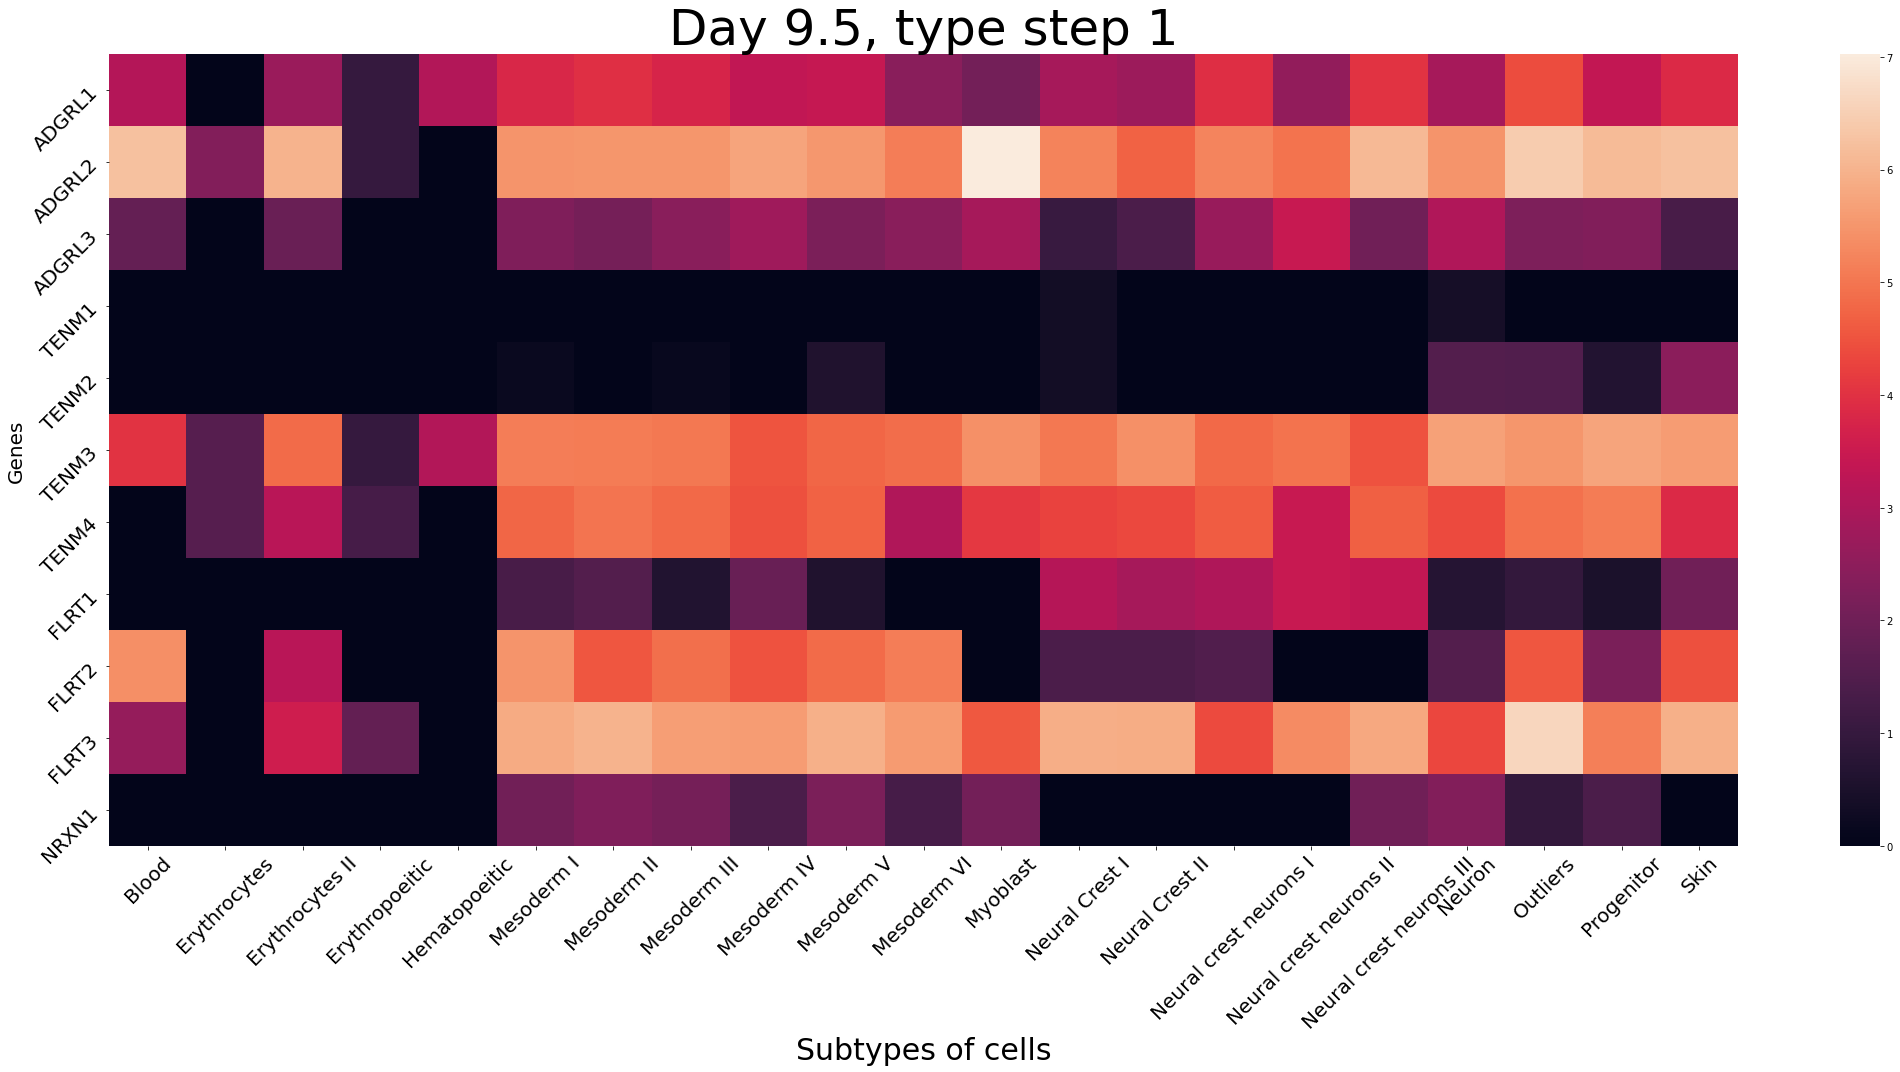

In [48]:
figure(figsize=(30,15))

b = sns.heatmap(log_celltypes_norm.iloc[:, :])

b.axes.set_title("Day 9.5, type step 1",fontsize=50)
b.set_xlabel("Subtypes of cells",fontsize=30)
b.set_ylabel("Genes",fontsize=20)
b.tick_params(labelsize=20)
plt.xticks(rotation=45)             
plt.yticks(rotation=45)             
plt.subplots_adjust(bottom = 0.15)
plt.tight_layout()




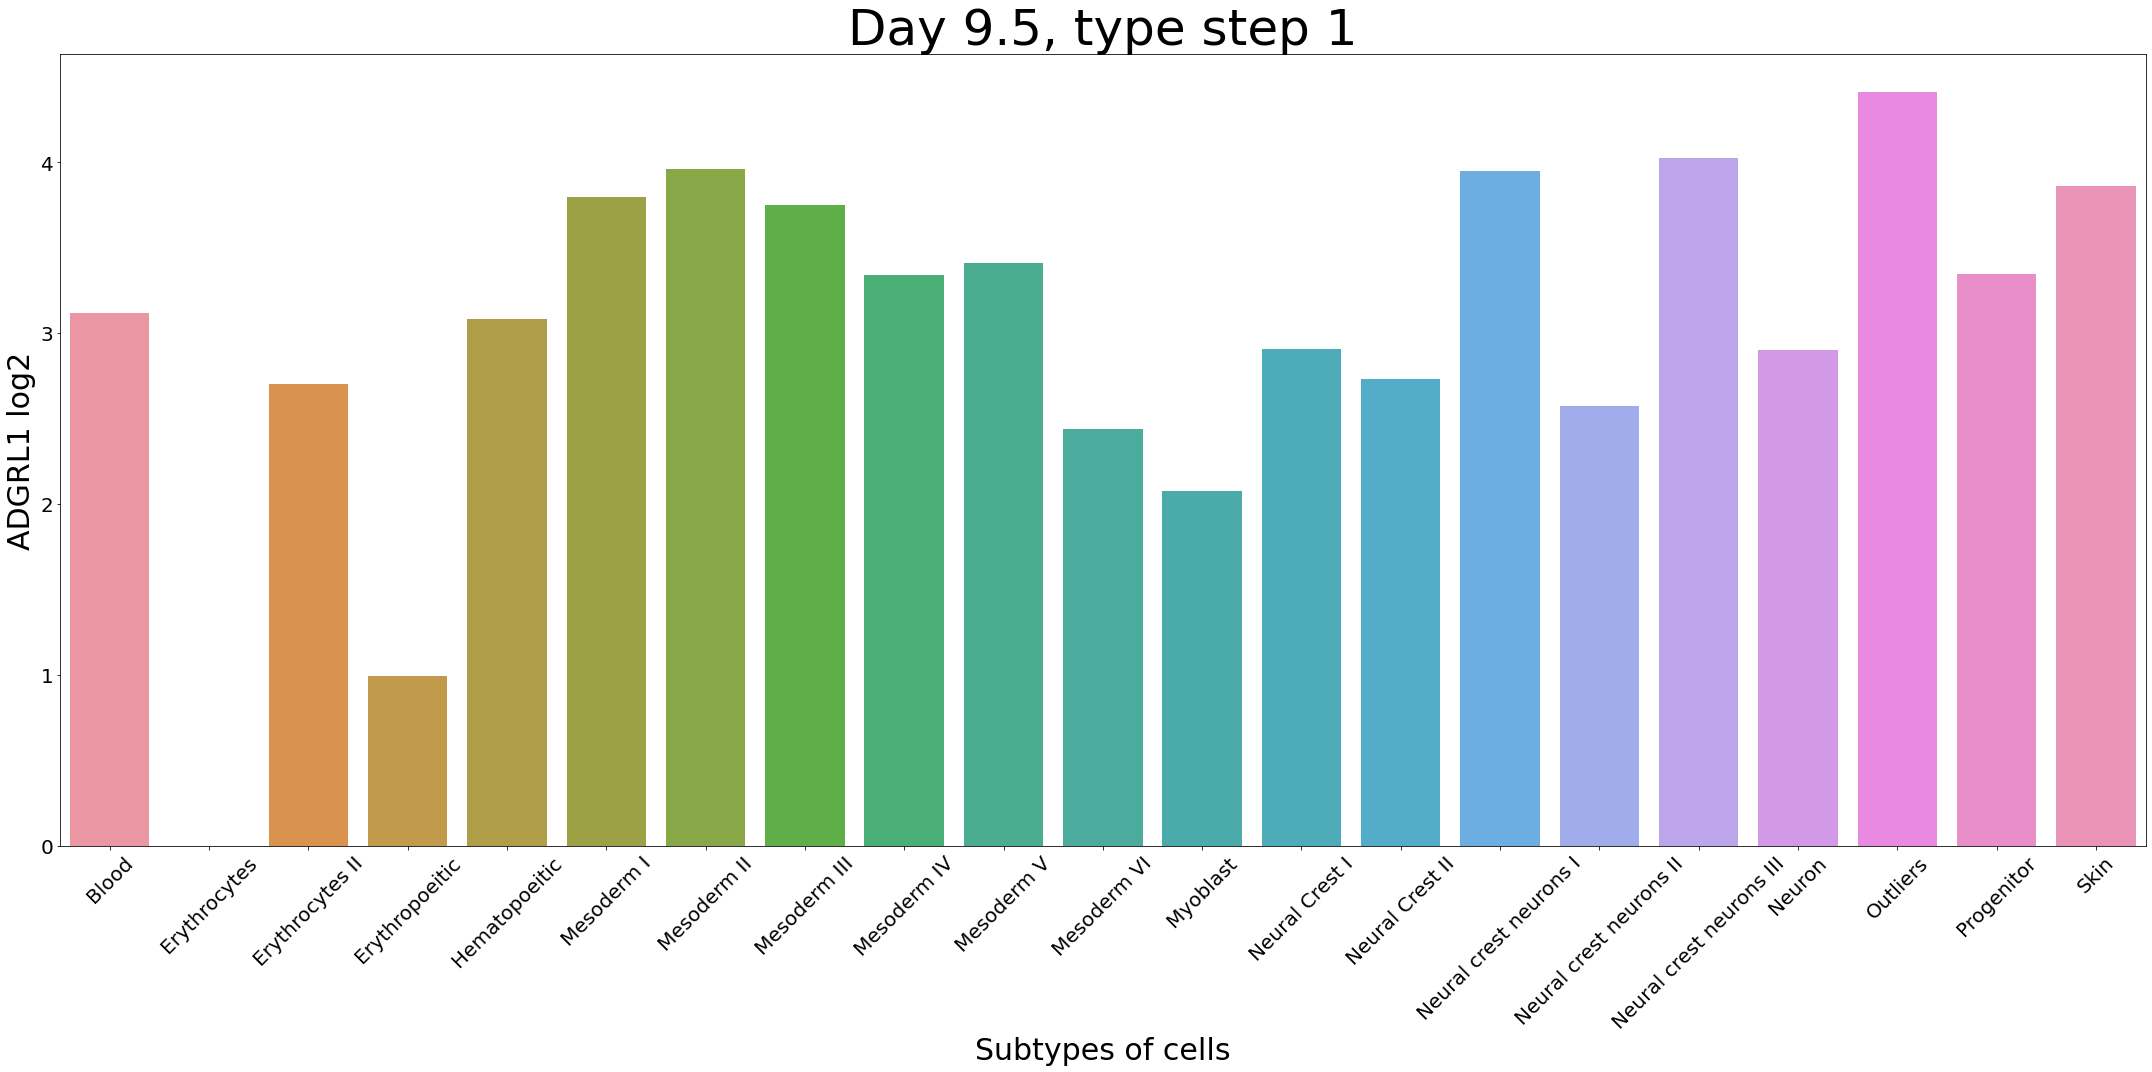

In [52]:
figure(figsize=(30,15))


b = sns.barplot(x=log_celltypes_norm.columns, y = log_celltypes_norm.loc['ADGRL1'])

b.axes.set_title("Day 9.5, type step 1",fontsize=50)
b.set_xlabel("Subtypes of cells",fontsize=30)
b.set_ylabel("ADGRL1 log2",fontsize=30)
b.tick_params(labelsize=20)
plt.xticks(rotation=45)             
plt.subplots_adjust(bottom = 0.15)


plt.tight_layout()